### Sheikh-Sedat Touray
### DSP 566
### Assignment 2
### Summer 2024

In [6]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 3.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 13.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 8.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 14.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 10.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 7.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.

## Importing the imlportant libraries 

In [251]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical


## Single Neuron Regession Model

In [252]:
# Single-neuron regression model function
def train_single_neuron_regression(X, y, learning_rate=0.1, epochs=1000):
    # Initialize weights and bias
    W = tf.Variable(tf.random.normal(shape=(X.shape[1], 1), dtype=tf.float64))
    b = tf.Variable(tf.random.normal(shape=(1,), dtype=tf.float64))

    # Training loop
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            # Compute predictions
            y_pred = tf.matmul(X, W) + b
            # Compute the mean squared error
            loss = tf.reduce_mean(tf.square(y - y_pred))

        # Compute gradients
        gradients = tape.gradient(loss, [W, b])
        
        # Update weights and bias
        W.assign_sub(learning_rate * gradients[0])
        b.assign_sub(learning_rate * gradients[1])

        # Print the loss every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.numpy()}")

    return W, b


In [253]:
# Loading cars data
cars = pd.read_csv('cars.csv')
cars = cars.drop(columns=['Unnamed: 0'])
X_cars = cars.drop('mpg', axis=1).values
y_cars = cars['mpg'].values

# Train and Test Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_cars, y_cars, test_size=0.2, random_state=42)

#Preprocessing/scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

In [254]:
for lr in [0.000001, 0.01, 0.1]:
    # Train the model
    W, b = train_single_neuron_regression(X_train_scaled, y_train_reg,learning_rate=lr, epochs=1000)
# Evaluate the model
y_pred_train = tf.matmul(X_train_scaled, W) + b
y_pred_test = tf.matmul(X_test_scaled, W) + b
train_loss = tf.reduce_mean(tf.square(y_train_reg - y_pred_train))
test_loss = tf.reduce_mean(tf.square(y_test_reg - y_pred_test))

print(f"Regression model - Train loss: {train_loss.numpy()}, Test loss: {test_loss.numpy()}, l_rate: {lr}")

Epoch 0, Loss: 455.04878858654115
Epoch 10, Loss: 455.0305327495195
Epoch 20, Loss: 455.01227796603115
Epoch 30, Loss: 454.9940242359578
Epoch 40, Loss: 454.9757715591806
Epoch 50, Loss: 454.95751993558144
Epoch 60, Loss: 454.9392693650421
Epoch 70, Loss: 454.92101984744386
Epoch 80, Loss: 454.9027713826685
Epoch 90, Loss: 454.8845239705979
Epoch 100, Loss: 454.8662776111135
Epoch 110, Loss: 454.8480323040973
Epoch 120, Loss: 454.8297880494307
Epoch 130, Loss: 454.8115448469959
Epoch 140, Loss: 454.7933026966744
Epoch 150, Loss: 454.77506159834826
Epoch 160, Loss: 454.75682155189907
Epoch 170, Loss: 454.73858255720893
Epoch 180, Loss: 454.7203446141595
Epoch 190, Loss: 454.7021077226329
Epoch 200, Loss: 454.683871882511
Epoch 210, Loss: 454.6656370936758
Epoch 220, Loss: 454.64740335600936
Epoch 230, Loss: 454.62917066939355
Epoch 240, Loss: 454.6109390337103
Epoch 250, Loss: 454.59270844884196
Epoch 260, Loss: 454.5744789146706
Epoch 270, Loss: 454.5562504310779
Epoch 280, Loss: 454.5

## Fully Connected Regression Model

In [255]:
class SimpleDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None):
        super(SimpleDense, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros')

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        return self.activation(z)


In [276]:
# Build the regression model
regression_model = tf.keras.models.Sequential([
    SimpleDense(units=64, activation='relu'),
    SimpleDense(units=64, activation='relu'),
    SimpleDense(units=1)  # No activation in the output layer for regression
])

# Compile the model
regression_model.compile(optimizer='SGD', loss='mse')

# Train the model and capture the history
history1 = regression_model.fit(X_train_scaled, y_train_reg, epochs=1000, batch_size=32, validation_split=0.2)

# Evaluate the model
train_loss = regression_model.evaluate(X_train_scaled, y_train_reg, verbose=0)
test_loss = regression_model.evaluate(X_test_scaled, y_test_reg, verbose=0)
print(f"Regression model - Train loss: {train_loss}, Test loss: {test_loss}")


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step - loss: 450.1263 - val_loss: 389.3535
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 431.2015 - val_loss: 372.8760
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 412.8775 - val_loss: 354.9719
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 392.9762 - val_loss: 332.6214
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 368.1666 - val_loss: 297.8873
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 329.5876 - val_loss: 226.6978
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 250.4948 - val_loss: 67.0211
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 75.5553 - val_loss: 80.5673
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 125.1625 - val_loss: 253.0645
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 276.1244 - val_loss: 202.7329
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 202.5177 - val_loss: 199.6552
Epoch 12/1000
1/1 ━━━

In [277]:
# Compare first few predictions with actual values for training set
print("\nFirst few predictions vs actual values (Training set):")
for i in range(5):
    print(f"Prediction: {y_pred_train[i].numpy()[0]:.2f}, Actual: {y_train_reg[i]:.2f}")

# Compare first few predictions with actual values for test set
print("\nFirst few predictions vs actual values (Test set):")
for i in range(5):
    print(f"Prediction: {y_pred_test[i].numpy()[0]:.2f}, Actual: {y_test_reg[i]:.2f}")


First few predictions vs actual values (Training set):
Prediction: 0.98, Actual: 27.30
Prediction: 0.00, Actual: 17.30
Prediction: 0.99, Actual: 21.00
Prediction: 0.98, Actual: 18.70
Prediction: 0.98, Actual: 14.70

First few predictions vs actual values (Test set):
Prediction: 0.81, Actual: 19.70
Prediction: 0.00, Actual: 10.40
Prediction: 0.08, Actual: 19.20
Prediction: 0.98, Actual: 32.40
Prediction: 0.98, Actual: 22.80


The predictions compared to the actual values are good some are way off while some are very close. 

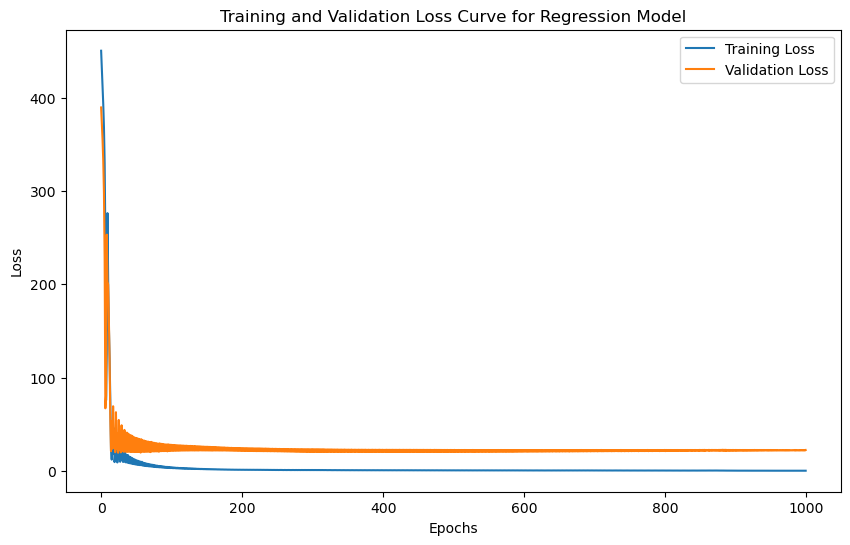

In [278]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve for Regression Model')
plt.legend()
plt.show()

It is a good that sign that my training loss is lower than the validation loss. This shows that my model is performing well. 

## Loading the cancer data

In [259]:
# Load cancer data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

# Split the data into training and test sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_clf)
X_test_sc = scaler.transform(X_test_clf)

## Single Neuron Classification Model

In [260]:
# Single-neuron classification model
def train_single_neuron_classification(X, y, learning_rate=0.01, epochs=100):
    # Initialize weights and bias
    W = tf.Variable(tf.random.normal(shape=(X.shape[1], 1), dtype=tf.float64))
    b = tf.Variable(tf.random.normal(shape=(1,), dtype=tf.float64))

    # Reshape y to match the output shape
    y = y.reshape(-1, 1)
    
    # List to store loss values
    loss_history = []

    # Training loop
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            # Compute logits
            logits = tf.matmul(X, W) + b
            # Apply sigmoid activation
            y_pred = tf.sigmoid(logits)
            # Compute binary cross-entropy loss
            loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, y_pred))

        # Compute gradients
        gradients = tape.gradient(loss, [W, b])
        
        # Record the loss
        loss_history.append(loss.numpy())
        
        # Update weights and bias
        W.assign_sub(learning_rate * gradients[0])
        b.assign_sub(learning_rate * gradients[1])

        # Print the loss every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.numpy()}")

    return W, b


In [261]:
for lr in [0.001, 0.01, 0.1]:
    
    # Train the model
    W, b = train_single_neuron_classification(X_train_sc, y_train_clf,learning_rate=lr, epochs=50)

# Evaluate the model
logits_train = tf.matmul(X_train_sc, W) + b
logits_test = tf.matmul(X_test_sc, W) + b
y_pred_train = tf.sigmoid(logits_train)
y_pred_test = tf.sigmoid(logits_test)

# Reshape y_train_clf and y_test_clf to match y_pred_train and y_pred_test
y_train_clf = y_train_clf.reshape(-1, 1)
y_test_clf = y_test_clf.reshape(-1, 1)

train_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_train_clf, y_pred_train))
test_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_test_clf, y_pred_test))

train_acc = tf.reduce_mean(tf.cast(tf.equal(tf.round(y_pred_train), y_train_clf), tf.float64))
test_acc = tf.reduce_mean(tf.cast(tf.equal(tf.round(y_pred_test), y_test_clf), tf.float64))

print(f"Classification model - Train loss: {train_loss.numpy()}, Train accuracy: {train_acc.numpy()}, l_rate: {lr}")
print(f"Classification model - Test loss: {test_loss.numpy()}, Test accuracy: {test_acc.numpy()}, l_rate: {lr}")

Epoch 0, Loss: 1.0912872486336613
Epoch 10, Loss: 1.0857104060202825
Epoch 20, Loss: 1.080186381519952
Epoch 30, Loss: 1.0747145961189766
Epoch 40, Loss: 1.069294496465779
Epoch 0, Loss: 6.035931210152455
Epoch 10, Loss: 5.621607043662584
Epoch 20, Loss: 5.208770201383749
Epoch 30, Loss: 4.792633326543495
Epoch 40, Loss: 4.373533159823839
Epoch 0, Loss: 1.2088780443482472
Epoch 10, Loss: 0.5717002957550543
Epoch 20, Loss: 0.3844652343620729
Epoch 30, Loss: 0.29692266766513126
Epoch 40, Loss: 0.2431938357161851
Classification model - Train loss: 0.20778212765138673, Train accuracy: 0.9362637362637363, l_rate: 0.1
Classification model - Test loss: 0.08543427653877328, Test accuracy: 0.9824561403508771, l_rate: 0.1


## Fully Connected Classification Model

In [262]:
# Set random seeds for reproducibility
np.random.seed(12)
tf.random.set_seed(12)
# Build the classification model
classification_model = tf.keras.models.Sequential([
    SimpleDense(units=64, activation='relu'),
    SimpleDense(units=64, activation='relu'),
    SimpleDense(units=1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and capture the history
history = classification_model.fit(X_train_sc, y_train_clf, epochs=20, batch_size=None, validation_split=0.2)

# Evaluate the model
train_loss, train_acc = classification_model.evaluate(X_train_sc, y_train_clf, verbose=0)
test_loss, test_acc = classification_model.evaluate(X_test_sc, y_test_clf, verbose=0)
print(f"Classification model - Train loss: {train_loss}, Train accuracy: {train_acc}")
print(f"Classification model - Test loss: {test_loss}, Test accuracy: {test_acc}")


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7345 - loss: 0.6785 - val_accuracy: 0.9341 - val_loss: 0.6164
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9321 - loss: 0.5927 - val_accuracy: 0.9341 - val_loss: 0.4641
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9270 - loss: 0.4297 - val_accuracy: 0.9341 - val_loss: 0.2738
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9506 - loss: 0.2498 - val_accuracy: 0.9560 - val_loss: 0.1661
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9554 - loss: 0.1467 - val_accuracy: 0.9670 - val_loss: 0.1269
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9723 - loss: 0.1001 - val_accuracy: 0.9780 - val_loss: 0.1104
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9779 - loss: 0.0779 - val_accuracy: 0.9780 - val_loss: 0.1023
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9805 - loss: 0.0669 - val_accuracy: 0.9780 - val_loss

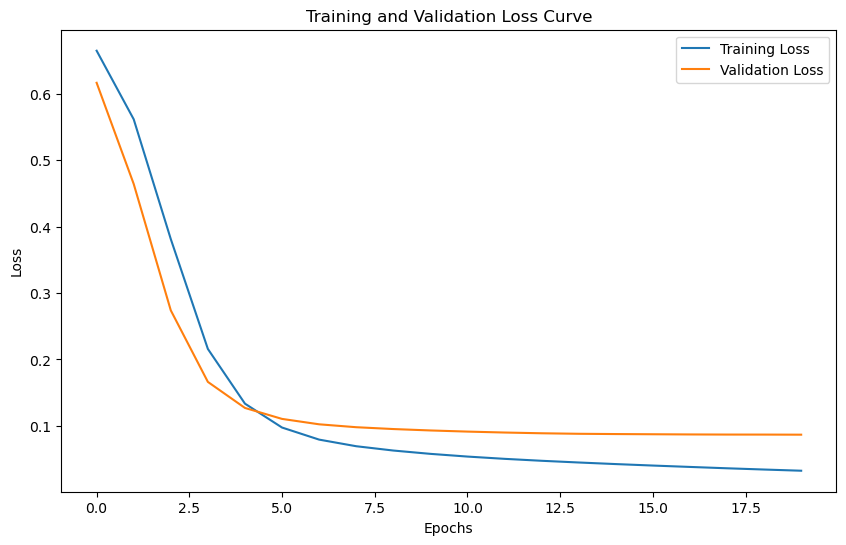

In [263]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.show()

It is a good that sign that my training loss is lower than the validation loss. This shows that my model is performing well. 

In [264]:
# Predict on the train and test sets
y_train_pred = tf.round(y_pred_train).numpy().flatten()
y_test_pred = tf.round(y_pred_test).numpy().flatten()

# Compare with actual values for the first few predictions
print("\nComparison of actual and predicted values on the training set:")
for i in range(10):
    print(f"Actual: {y_train_clf[i, 0]}, Predicted: {y_train_pred[i]}")

print("\nComparison of actual and predicted values on the test set:")
for i in range(10):
    print(f"Actual: {y_test_clf[i, 0]}, Predicted: {y_test_pred[i]}")


Comparison of actual and predicted values on the training set:
Actual: 1, Predicted: 1.0
Actual: 0, Predicted: 0.0
Actual: 1, Predicted: 1.0
Actual: 1, Predicted: 1.0
Actual: 1, Predicted: 1.0
Actual: 0, Predicted: 0.0
Actual: 1, Predicted: 0.0
Actual: 1, Predicted: 1.0
Actual: 1, Predicted: 1.0
Actual: 0, Predicted: 0.0

Comparison of actual and predicted values on the test set:
Actual: 1, Predicted: 1.0
Actual: 0, Predicted: 0.0
Actual: 0, Predicted: 0.0
Actual: 1, Predicted: 1.0
Actual: 1, Predicted: 1.0
Actual: 0, Predicted: 0.0
Actual: 0, Predicted: 0.0
Actual: 0, Predicted: 0.0
Actual: 1, Predicted: 1.0
Actual: 1, Predicted: 1.0


## Revisiting DSP 556 models and the MNIST Dataset 

In [265]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [266]:
def build_model_relu_adam():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_relu_adam = build_model_relu_adam()
history_relu_adam = model_relu_adam.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10


/Users/fulladu/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8469 - loss: 0.5081 - val_accuracy: 0.9557 - val_loss: 0.1521
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9617 - loss: 0.1296 - val_accuracy: 0.9657 - val_loss: 0.1188
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9747 - loss: 0.0864 - val_accuracy: 0.9678 - val_loss: 0.1130
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9805 - loss: 0.0648 - val_accuracy: 0.9688 - val_loss: 0.1173
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9845 - loss: 0.0494 - val_accuracy: 0.9696 - val_loss: 0.1185
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9867 - loss: 0.0391 - val_accuracy: 0.9698 - val_loss: 0.1207
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9890 - loss: 0.0341 - val_accuracy: 0.9717 - val_loss: 0.1304
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9884 - loss: 0.0355 - val_accurac

**ReLU Activation with Adam Optimizer:**

ReLU is commonly used in deep learning because it helps to mitigate the vanishing gradient problem. Adam is a widely used optimizer that combines the advantages of both AdaGrad and RMSProp.
Typically, this combination provides good convergence and accuracy and as can be seen above it worked nicely here. 

In [267]:
def build_model_sigmoid_sgd():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='sigmoid'),
        Dense(64, activation='sigmoid'),
        Dense(32, activation='sigmoid'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_sigmoid_sgd = build_model_sigmoid_sgd()
history_sigmoid_sgd = model_sigmoid_sgd.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1087 - loss: 2.3244 - val_accuracy: 0.1060 - val_loss: 2.2941
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1253 - loss: 2.2905 - val_accuracy: 0.1063 - val_loss: 2.2807
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1636 - loss: 2.2749 - val_accuracy: 0.1773 - val_loss: 2.2543
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2460 - loss: 2.2406 - val_accuracy: 0.2758 - val_loss: 2.1821
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3173 - loss: 2.1420 - val_accuracy: 0.3487 - val_loss: 1.9947
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3948 - loss: 1.9357 - val_accuracy: 0.4373 - val_loss: 1.7675
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4752 - loss: 1.7065 - val_accuracy: 0.5377 - val_loss: 1.4866
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5651 - loss: 1.4242 - 

**Sigmoid Activation with SGD Optimizer:**

Sigmoid activation is one of the oldest activation functions and is used here for comparison. SGD is a basic optimizer that updates weights based on the gradient.
This combination may converge slower and is susceptible to getting stuck in local minima. However as the metrics can be observed above it did not work very well and it is the poorest performing of my three models. 

In [268]:
def build_model_tanh_rmsprop():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(32, activation='tanh'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_tanh_rmsprop = build_model_tanh_rmsprop()
history_tanh_rmsprop = model_tanh_rmsprop.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8688 - loss: 0.4749 - val_accuracy: 0.9505 - val_loss: 0.1681
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9560 - loss: 0.1509 - val_accuracy: 0.9623 - val_loss: 0.1272
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9706 - loss: 0.0999 - val_accuracy: 0.9662 - val_loss: 0.1119
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9793 - loss: 0.0733 - val_accuracy: 0.9704 - val_loss: 0.1036
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9844 - loss: 0.0561 - val_accuracy: 0.9699 - val_loss: 0.1057
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9883 - loss: 0.0431 - val_accuracy: 0.9718 - val_loss: 0.1030
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9908 - loss: 0.0344 - val_accuracy: 0.9693 - val_loss: 0.1109
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9931 - loss: 0.0270 - 

**Tanh Activation with RMSprop Optimizer:**

Tanh is similar to sigmoid but outputs zero-centered activations, which often leads to better convergence. RMSprop is designed to adapt the learning rate based on the average of recent gradients.
This combination generally provides good performance and is less likely to get stuck in local minima compared to sigmoid and SGD.And this is exactly what happened because it is an improvement of the former model. 

In [269]:
# Evaluate on the test set
test_loss_relu_adam, test_acc_relu_adam = model_relu_adam.evaluate(X_test, y_test)
test_loss_sigmoid_sgd, test_acc_sigmoid_sgd = model_sigmoid_sgd.evaluate(X_test, y_test)
test_loss_tanh_rmsprop, test_acc_tanh_rmsprop = model_tanh_rmsprop.evaluate(X_test, y_test)

print(f"ReLU + Adam - Test loss: {test_loss_relu_adam}, Test accuracy: {test_acc_relu_adam}")
print(f"Sigmoid + SGD - Test loss: {test_loss_sigmoid_sgd}, Test accuracy: {test_acc_sigmoid_sgd}")
print(f"Tanh + RMSprop - Test loss: {test_loss_tanh_rmsprop}, Test accuracy: {test_acc_tanh_rmsprop}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9716 - loss: 0.1451
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6952 - loss: 0.9614
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.9669 - loss: 0.1371
ReLU + Adam - Test loss: 0.12492071837186813, Test accuracy: 0.9750999808311462
Sigmoid + SGD - Test loss: 0.9111033082008362, Test accuracy: 0.7156000137329102
Tanh + RMSprop - Test loss: 0.11429793387651443, Test accuracy: 0.9718000292778015


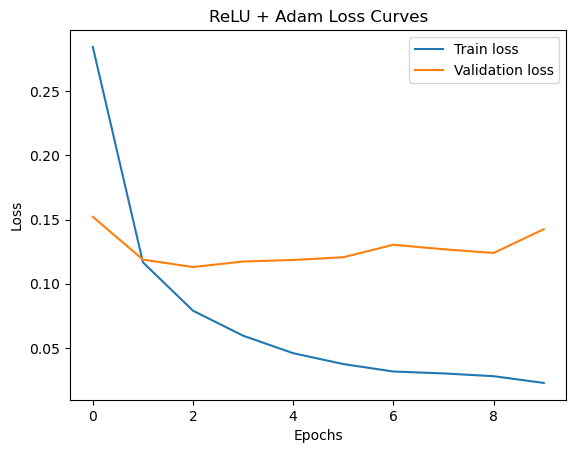

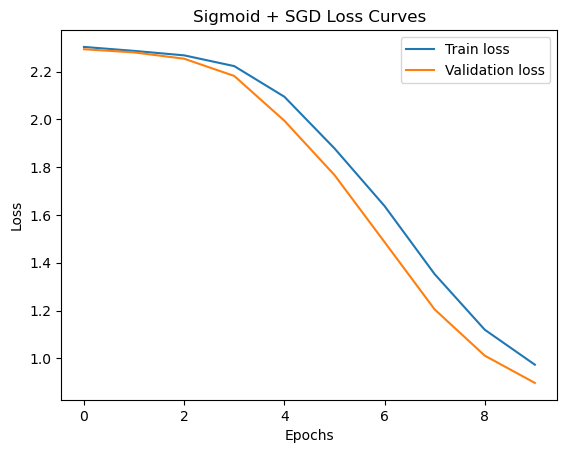

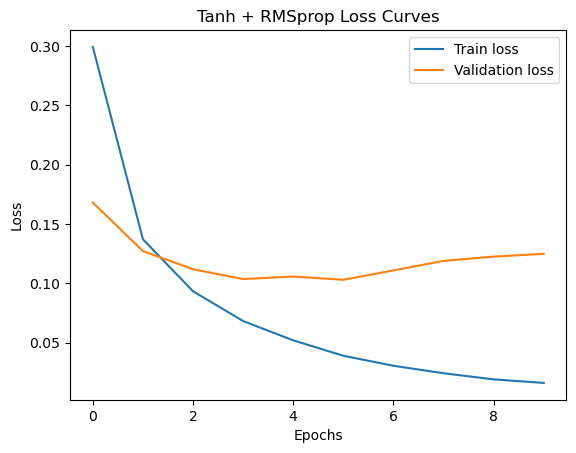

In [270]:
# Plot training and validation loss curves
def plot_loss_curves(history, title):
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss_curves(history_relu_adam, 'ReLU + Adam Loss Curves')
plot_loss_curves(history_sigmoid_sgd, 'Sigmoid + SGD Loss Curves')
plot_loss_curves(history_tanh_rmsprop, 'Tanh + RMSprop Loss Curves')


From the plots and the computations of the metrics we can observe that all of these models are performing very well on mnist classification problem except when the Sigmoid activation was used in the hidden layers and the SGD optimizer. 

In [271]:
# Make predictions on the test set
y_pred_prob = model_relu_adam.predict(X_test)
y_pred_classes = tf.argmax(y_pred_prob, axis=1).numpy()

# Get the actual classes from the test set
y_test_classes = tf.argmax(y_test, axis=1).numpy()

# Compare the first few predictions with actual values
comparison_df = pd.DataFrame({
    'Actual': y_test_classes,
    'Predicted': y_pred_classes
})

print(comparison_df.head(10))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   Actual  Predicted
0       7          7
1       2          2
2       1          1
3       0          0
4       4          4
5       1          1
6       4          4
7       9          9
8       5          5
9       9          9


The first few observations above show perfect predictions. 

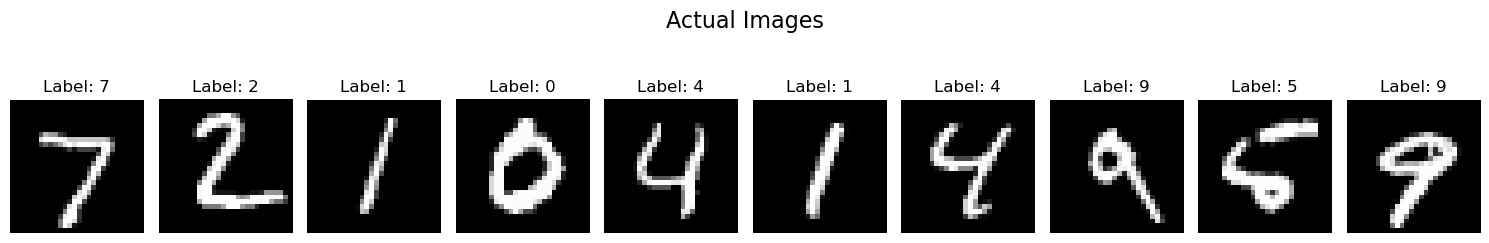

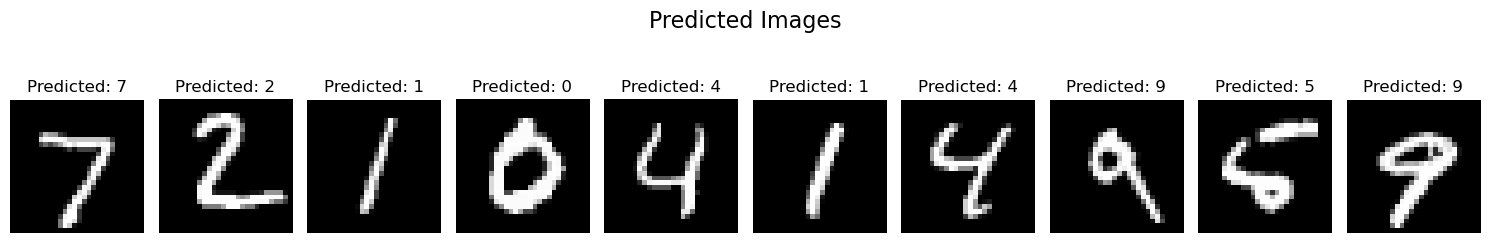

In [273]:

# Number of images to display
n_images = 10

# Create a figure for actual images
plt.figure(figsize=(15, 5))
plt.suptitle("Actual Images", fontsize=16)

for i in range(n_images):
    plt.subplot(2, n_images, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Label: {y_test_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Create a figure for predicted images
plt.figure(figsize=(15, 5))
plt.suptitle("Predicted Images", fontsize=16)

for i in range(n_images):
    plt.subplot(2, n_images, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {y_pred_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


**Additional Steps:**

Batch Normalization: Adding batch normalization after each dense layer can stabilize and accelerate the training process.
Learning Rate Scheduling: Implementing learning rate scheduling to reduce the learning rate as training progresses can help in achieving better convergence.
Dropout: Adding dropout layers can help in regularizing the model and preventing overfitting.